In [10]:
# 2 Practice
# Visualisation
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import uniform, beta, probplot

# here i will be inilatizing values 
samples1 = uniform.rvs(size=10000)
samples2 = beta.rvs(a=3, b=12, size=10000)
samples3 = beta.rvs(a=11, b=3, size=10000)

#Here now i need to define parameters for target Beta Distribution
a_target, b_target = 10, 12
target_beta = beta(a=a_target, b=b_target)

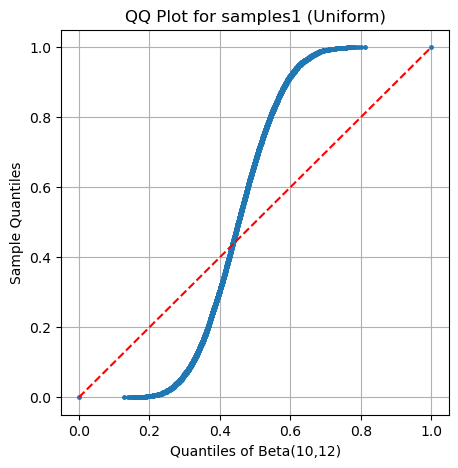

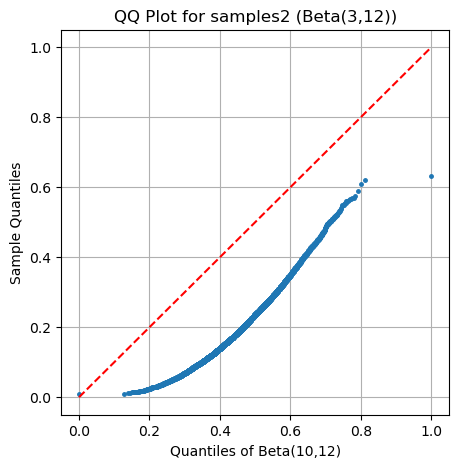

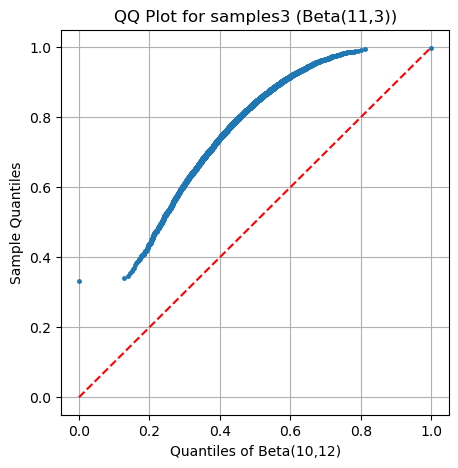

In [13]:
# Function to create QQ plot against Beta(10, 12)
def qq_plot(samples, dist, title):
    quantiles = np.linspace(0, 1, len(samples))
    sample_quantiles = np.quantile(samples, quantiles)
    model_quantiles = dist.ppf(quantiles)
    
    plt.figure(figsize=(5, 5))
    plt.plot(model_quantiles, sample_quantiles, 'o', markersize=2.5)
    plt.plot([min(model_quantiles), max(model_quantiles)],
             [min(model_quantiles), max(model_quantiles)], 'r--')
    plt.xlabel("Quantiles of Beta(10,12)")
    plt.ylabel("Sample Quantiles")
    plt.title(title)
    plt.grid()
    plt.show()

# we will set Plots for each sample set as given in question
qq_plot(samples1, target_beta, "QQ Plot for samples1 (Uniform)")
qq_plot(samples2, target_beta, "QQ Plot for samples2 (Beta(3,12))")
qq_plot(samples3, target_beta, "QQ Plot for samples3 (Beta(11,3))")

All values in the sum are non-negative: True


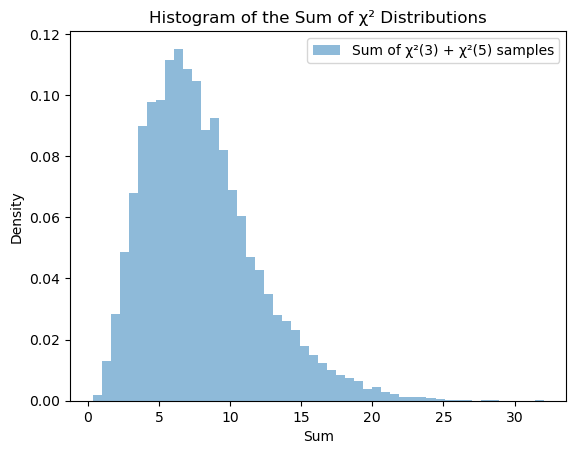

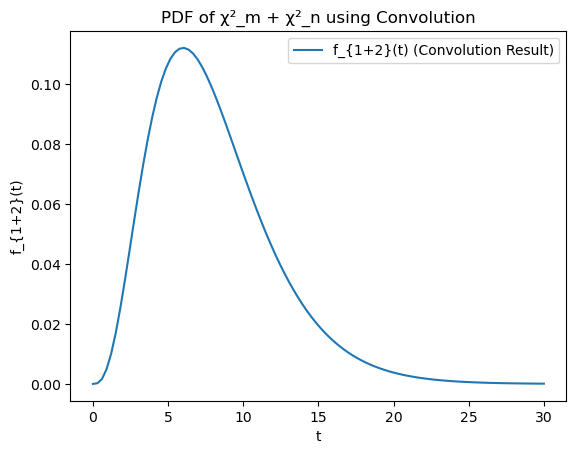

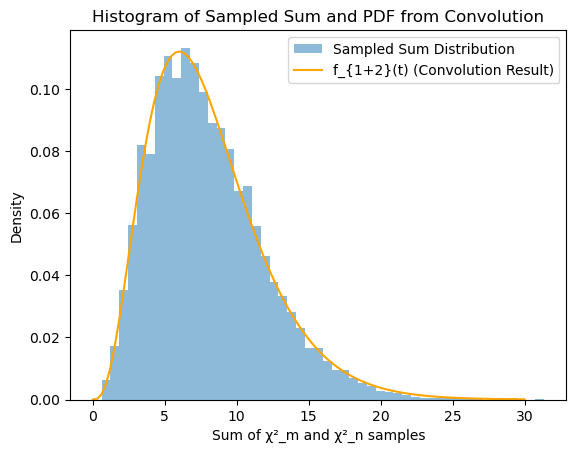

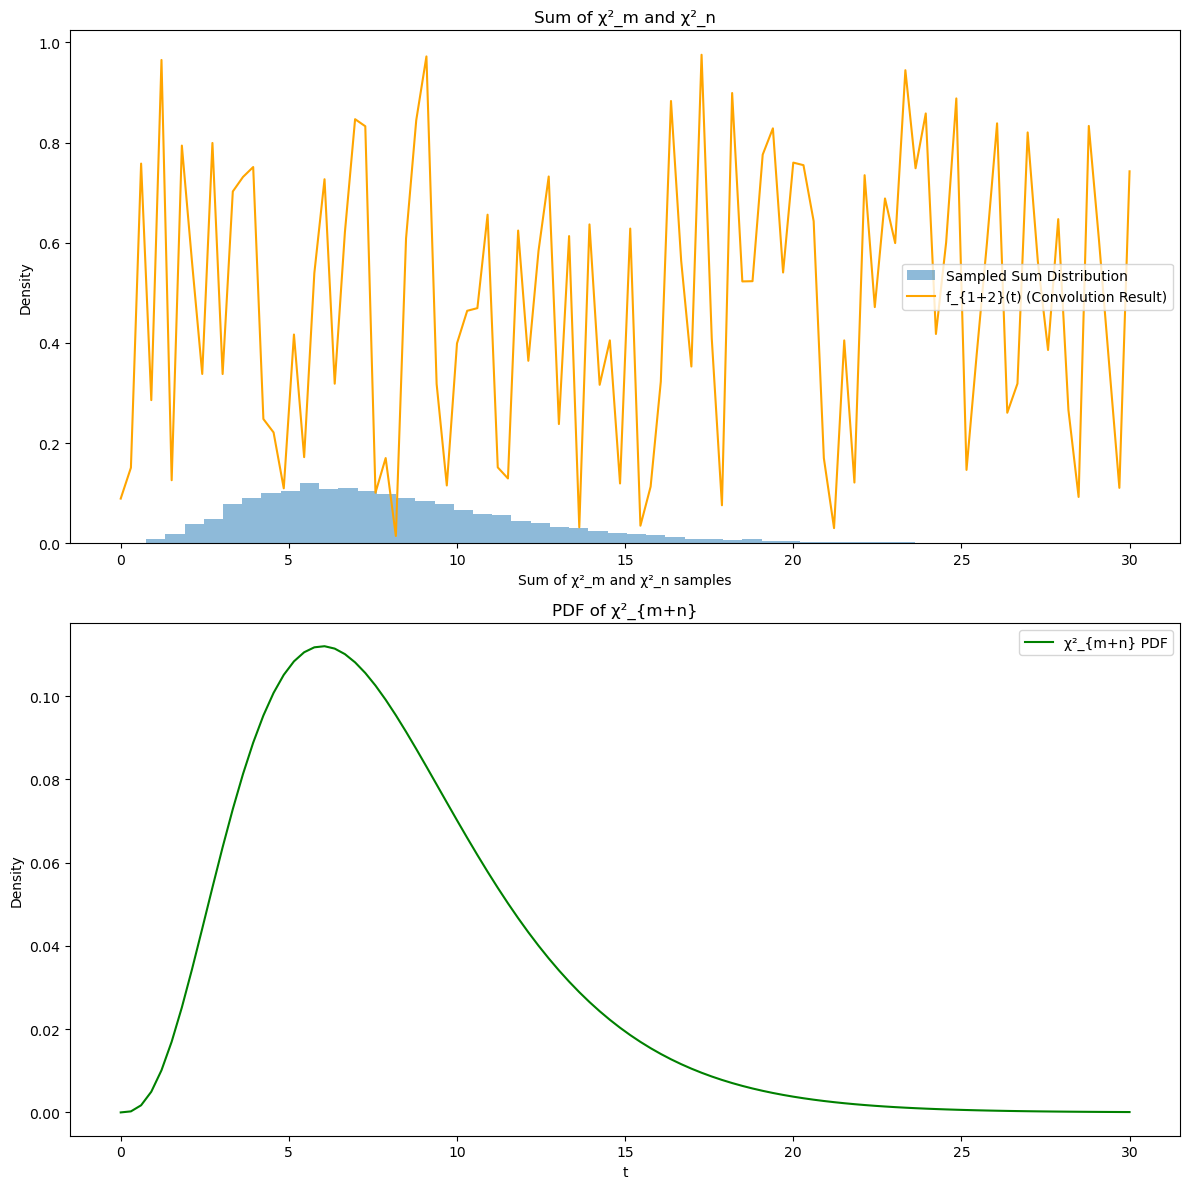

In [14]:
"""Independent sum of two probability measures
(a) What is the support of χ2m? What is the support of χ2n? Therefore,
 what is the support of χ2m +χ2n?
 """
from scipy.stats import chi2

# Here we have Parameters for the degrees of freedom
m, n = 3, 5

# Here this function will be generating 10000 samples from chi-squared distributions with m and n degrees of freedom
samples_m = chi2.rvs(m, size=10000)
samples_n = chi2.rvs(n, size=10000)

# Now we will be Computing the sum of the samples 
samples_sum = samples_m + samples_n

# Now we need to check if all values in the sum are non-negative (within the support [0, ∞))
all_non_negative = np.all(samples_sum >= 0)
print("All values in the sum are non-negative:", all_non_negative)

# Here i will be plotting histogram of the sum of samples
plt.hist(samples_sum, bins=50, density=True, alpha=0.5, label=f"Sum of χ²({m}) + χ²({n}) samples")
plt.xlabel("Sum")
plt.ylabel("Density")
plt.title("Histogram of the Sum of χ² Distributions")
plt.legend()
plt.show()



"""(b) Write a function which implements the integrand of the integral above,
that is to say that implements f1(x)f2(t − x), where f1 is the density of χ2m and f2 is 
the density of χ2n. (Hint: (a) this function will need two arguments, 
(b) you can define it easily using the pdf method of the distributions in scipy.stats.chi2.)"""

# We need to define a function for the integrand f_1(x) f_2(t - x), where:

# f_1 is the density of \chi^2_m, and
# f_2 is the density of \chi^2_n.

from scipy.stats import chi2

# Define degrees of freedom for m and n
m, n = 3, 5

# Define the integrand function
def integrand(x, t):
    f1 = chi2.pdf(x, m)         # PDF of chi-squared with m degrees of freedom
    f2 = chi2.pdf(t - x, n)     # PDF of chi-squared with n degrees of freedom
    return f1 * f2



"""
(c) Computing f_{1+2}(t) at 100 Points Using scipy.integrate.quad

To compute the convolution result, we need to integrate the integrand function over x for each point t using scipy.
integrate.quad. We’ll calculate f_{1+2}(t) at 100 points across the range of \chi^2_m + \chi^2_n.
"""

import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

# Generate 100 points along the support of χ²_m + χ²_n
t_values = np.linspace(0, 30, 100)  # Here we can adjust the upper limit based on the expected range of sum
f1_plus_2 = []

# Calculate f_{1+2}(t) for each t in t_values
for t in t_values:
    result, _ = quad(integrand, 0, t, args=(t,))
    f1_plus_2.append(result)

# Plot the computed PDF
plt.plot(t_values, f1_plus_2, label="f_{1+2}(t) (Convolution Result)")
plt.xlabel("t")
plt.ylabel("f_{1+2}(t)")
plt.title("PDF of χ²_m + χ²_n using Convolution")
plt.legend()
plt.show()


"""
(d) Generating and Plotting Histogram of Samples

Next, we’ll generate 10,000 samples from \chi^2_m and \chi^2_n, add them together,
and plot the histogram of these sums. 
We’ll overlay this histogram with the computed PDF from part (c).
"""
# Generate samples from χ²_m and χ²_n
samples_m = chi2.rvs(m, size=10000)
samples_n = chi2.rvs(n, size=10000)

# Compute the sum of the samples
samples_sum = samples_m + samples_n

# Plot histogram of the sums
plt.hist(samples_sum, bins=50, density=True, alpha=0.5, label="Sampled Sum Distribution")
plt.plot(t_values, f1_plus_2, label="f_{1+2}(t) (Convolution Result)", color='orange')
plt.xlabel("Sum of χ²_m and χ²_n samples")
plt.ylabel("Density")
plt.legend()
plt.title("Histogram of Sampled Sum and PDF from Convolution")
plt.show()



"""
(e) Verifying \chi^2_m + \chi^2_n = \chi^2_{m+n}

We now compare this with the PDF of \chi^2_{m+n} by plotting it side-by-side with the previous result. 
This will visually confirm that \chi^2_m + \chi^2_n follows a \chi^2_{m+n} distribution.
"""
import matplotlib.pyplot as plt
from scipy.stats import chi2
import numpy as np

# Define the distribution χ²_{m+n}
m, n = 3, 5
m_n_sum = m + n
chi2_mn = chi2(m_n_sum)

# Define t_values for plotting
t_values = np.linspace(0, 30, 100)

# Calculate the PDF of χ²_{m+n}
f_mn = chi2_mn.pdf(t_values)

# Assume f1_plus_2 and samples_sum are already defined from your convolution and sampling steps
# Example placeholders for illustration purposes
f1_plus_2 = np.random.rand(100)  # Replace with actual convolution result
samples_sum = np.random.chisquare(m, size=10000) + np.random.chisquare(n, size=10000)

# Create vertically stacked subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))

# Top plot: Histogram and convolution result
ax1.hist(samples_sum, bins=50, density=True, alpha=0.5, label="Sampled Sum Distribution")
ax1.plot(t_values, f1_plus_2, label="f_{1+2}(t) (Convolution Result)", color='orange')
ax1.set_title("Sum of χ²_m and χ²_n")
ax1.set_xlabel("Sum of χ²_m and χ²_n samples")
ax1.set_ylabel("Density")
ax1.legend()

# Bottom plot: PDF of χ²_{m+n}
ax2.plot(t_values, f_mn, label="χ²_{m+n} PDF", color='green')
ax2.set_title("PDF of χ²_{m+n}")
ax2.set_xlabel("t")
ax2.set_ylabel("Density")
ax2.legend()

plt.tight_layout()
plt.show()

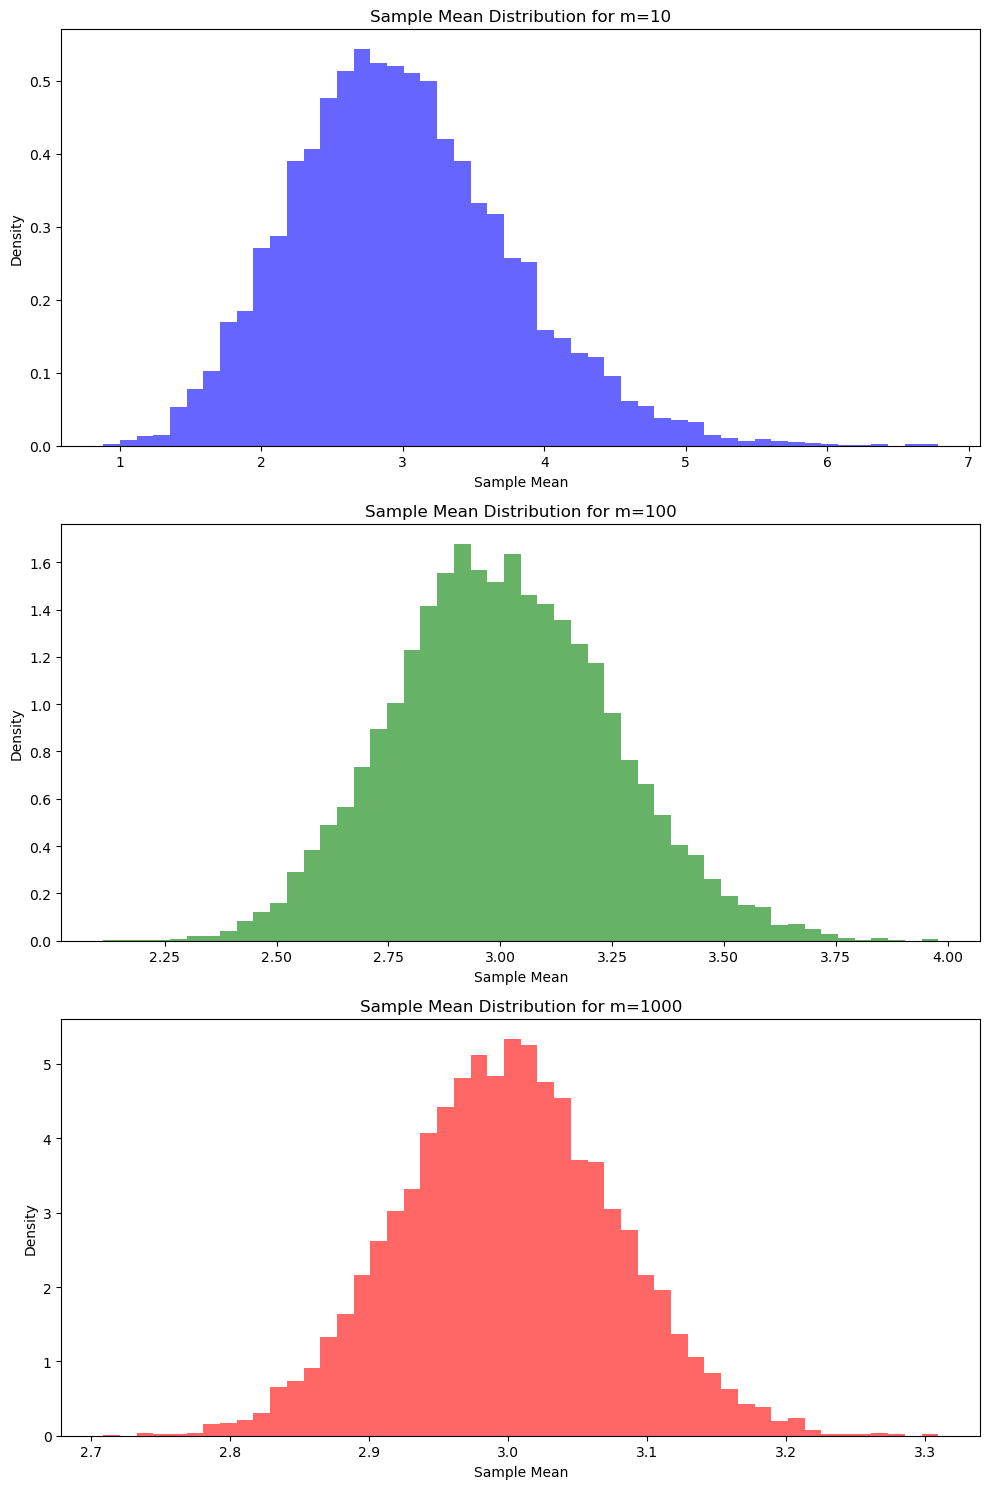

In [4]:
from scipy.stats import chi2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Function to generate sample mean distribution
def sample_mean_samples(m, n, k=3):
    # Generate n sets of m samples each from a chi-squared distribution with k degrees of freedom
    samples = chi2.rvs(k, size=(n, m))
    # Calculate the mean of each set of m samples
    sample_means = np.mean(samples, axis=1)
    return sample_means

# Generate sample means for m = 10, m = 100, and m = 1000, with n = 10000
sample_means_m10 = sample_mean_samples(m=10, n=10000)
sample_means_m100 = sample_mean_samples(m=100, n=10000)
sample_means_m1000 = sample_mean_samples(m=1000, n=10000)

# Plot histograms
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Histogram for m=10
axes[0].hist(sample_means_m10, bins=50, density=True, alpha=0.6, color='blue')
axes[0].set_title("Sample Mean Distribution for m=10")
axes[0].set_xlabel("Sample Mean")
axes[0].set_ylabel("Density")

# Histogram for m=100
axes[1].hist(sample_means_m100, bins=50, density=True, alpha=0.6, color='green')
axes[1].set_title("Sample Mean Distribution for m=100")
axes[1].set_xlabel("Sample Mean")
axes[1].set_ylabel("Density")

# Histogram for m=1000
axes[2].hist(sample_means_m1000, bins=50, density=True, alpha=0.6, color='red')
axes[2].set_title("Sample Mean Distribution for m=1000")
axes[2].set_xlabel("Sample Mean")
axes[2].set_ylabel("Density")

plt.tight_layout()
plt.show()

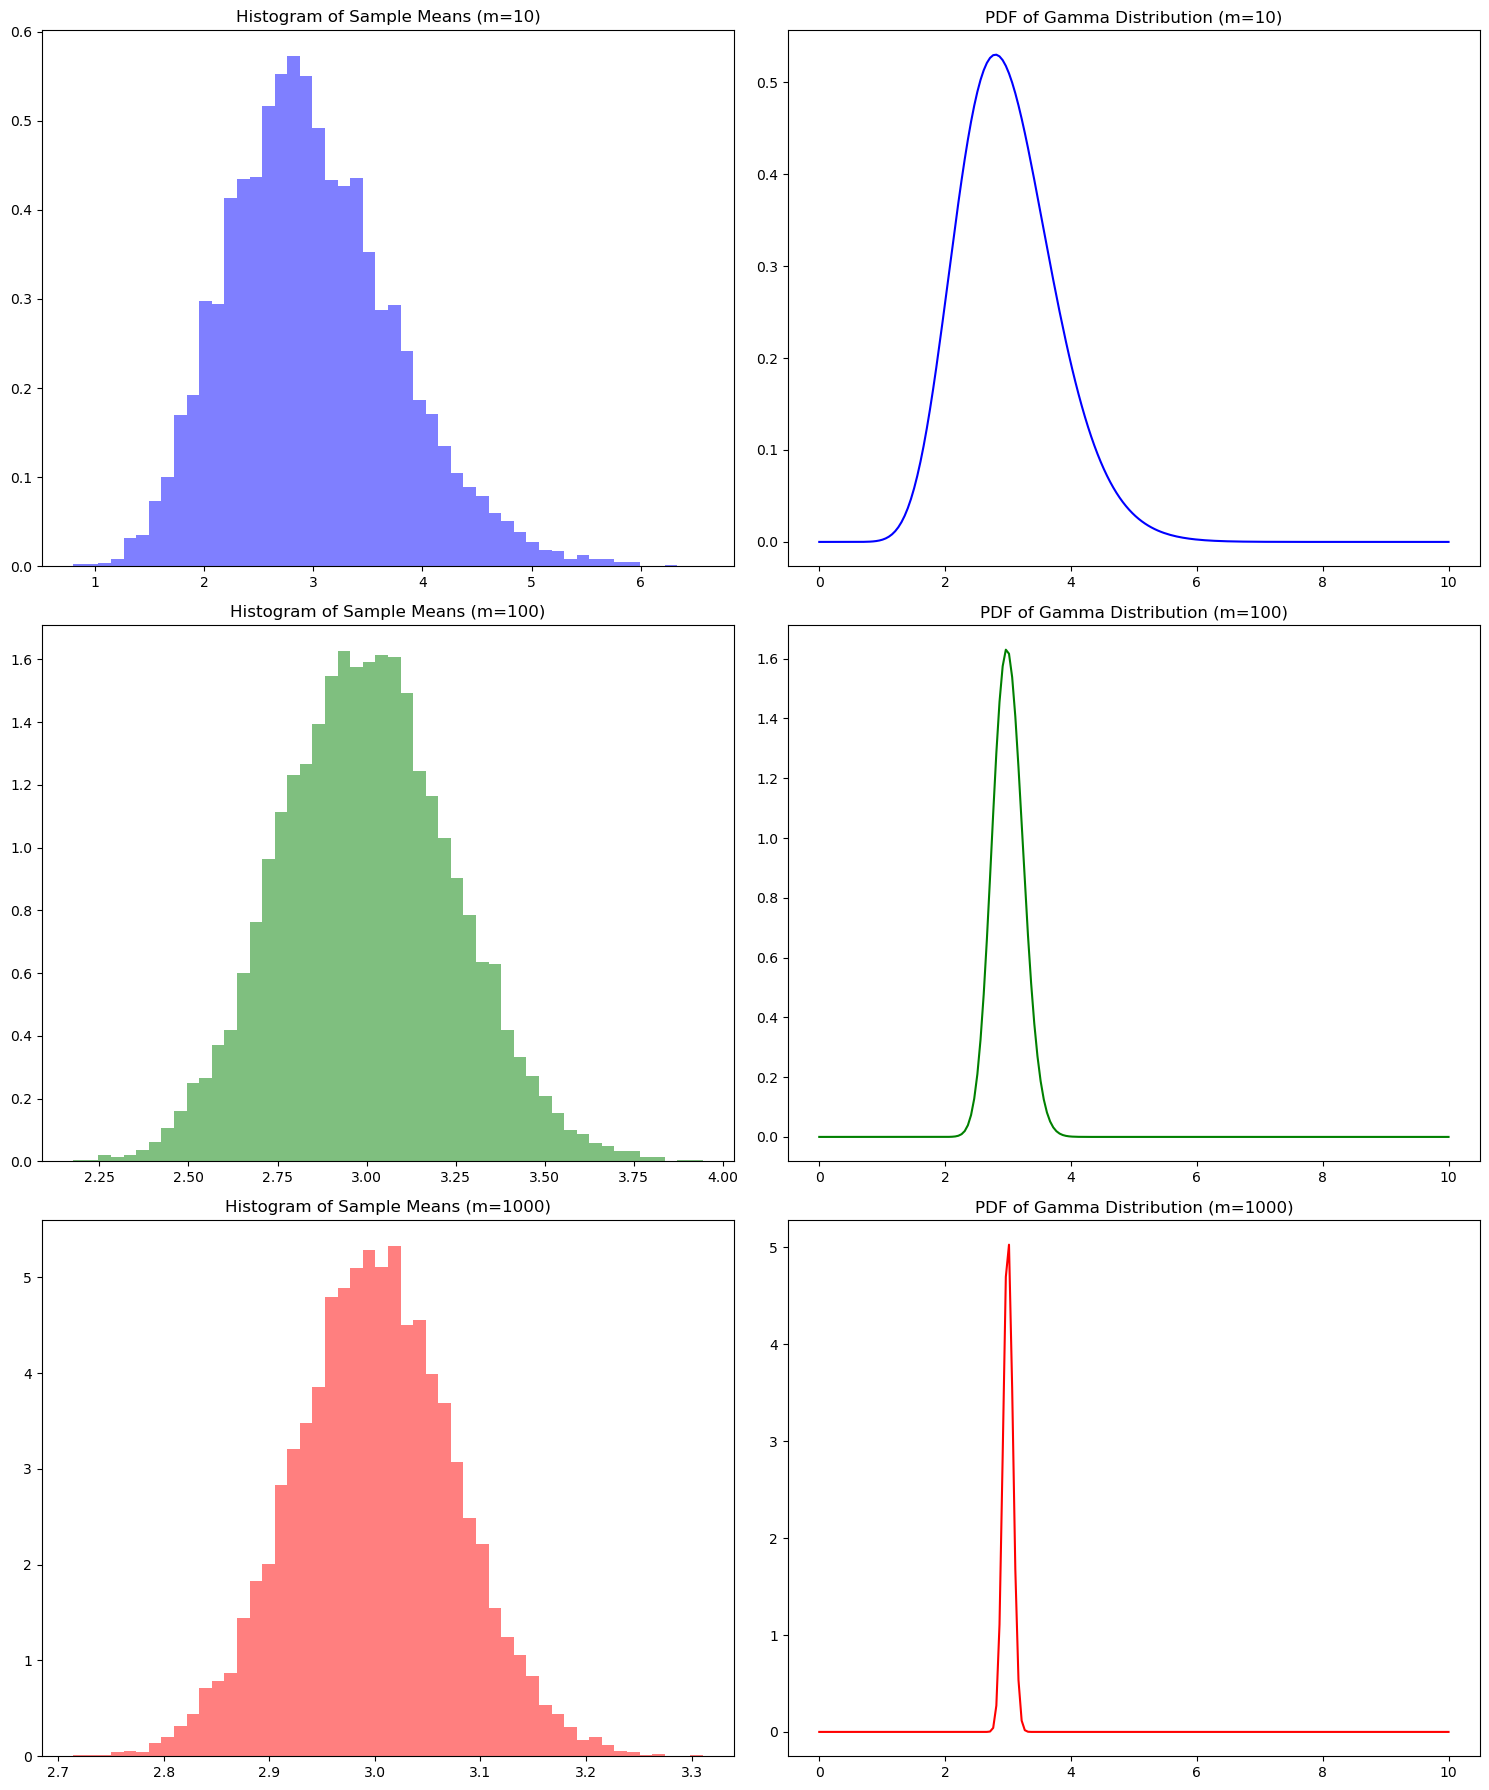